I do not own the dataset for this project.
The dataset for this project is provided by Andy Bramwell.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
game_df = pd.read_csv(r"D:\data_analysis\video_game_data_analysis\Video Games Sales.csv")

In [3]:
game_df.head(10)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,7,8,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,9,10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


In [4]:
game_df.shape

(1907, 13)

In [5]:
game_df.dtypes

index              int64
Rank               int64
Game Title        object
Platform          object
Year             float64
Genre             object
Publisher         object
North America    float64
Europe           float64
Japan            float64
Rest of World    float64
Global           float64
Review           float64
dtype: object

In [6]:
# Checking for missing Values
game_df.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [7]:
# Removing missing values to improve efficiency in analysis
game_df = game_df.dropna(subset=['Year','Publisher'])

In [8]:
# Double Checking missing values
game_df.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

Comparison of video games sales based on genre internationally.

In [9]:
game_df['total_sales'] = game_df['North America'] + game_df['Europe'] + game_df['Japan'] + game_df['Rest of World']
game_df['Global'] = game_df['total_sales']

In [10]:
game_df.head(5)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,total_sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.13,76.28,81.13
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.56,82.07,33.56
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,31.52
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,30.26


In [11]:
genre_based = game_df.groupby(['Genre'])['Global'].sum()

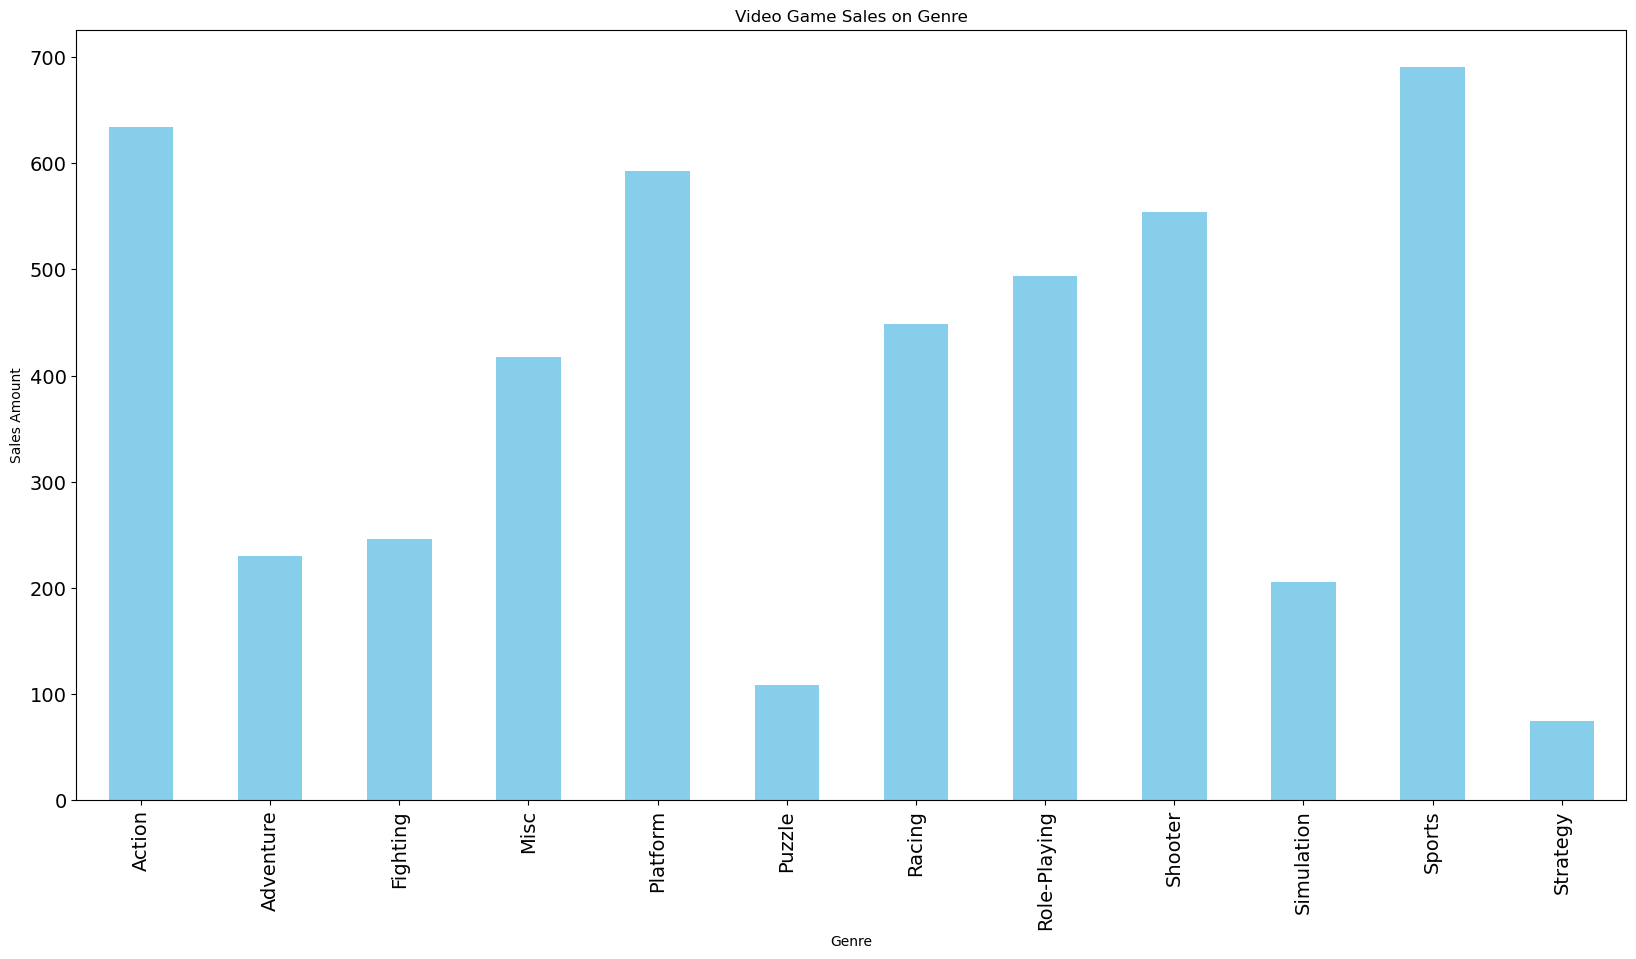

In [12]:
genre_based.plot(kind='bar', figsize=(20,10), xlabel='Genre', ylabel='Sales Amount', color='skyblue', title='Video Game Sales on Genre', fontsize=14)
plt.show()

Analysing popularity of videogames genres for each country.

In [13]:
game_df.columns

Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global', 'Review',
       'total_sales'],
      dtype='object')

In [14]:
def get_genres(country):
    return game_df.groupby(['Genre'])[country].sum().reset_index()

In [15]:
NA_genres = get_genres('North America')
EU_genres = get_genres('Europe')
JP_genres = get_genres('Japan')
Rest_genres = get_genres('Rest of World')

In [16]:
all_locations = NA_genres.merge(EU_genres, how='left', on='Genre').merge(JP_genres, how='left', on='Genre').merge(Rest_genres, how='left', on='Genre')
all_locations

,Genre,North America,Europe,Japan,Rest of World
0,Action,319.02,204.83,45.66,64.66
1,Adventure,110.98,74.82,26.38,17.98
2,Fighting,131.50,62.47,34.01,18.03
3,Misc,199.36,129.47,50.78,37.46
4,Platform,315.68,138.98,104.17,34.36
5,Puzzle,60.72,18.58,25.00,4.35
6,Racing,213.75,150.06,43.37,41.59
7,Role-Playing,197.25,100.67,167.76,28.45
8,Shooter,331.74,154.37,14.22,53.39
9,Simulation,101.13,64.08,24.31,15.53


In [17]:
all_locations.set_index('Genre', inplace=True)
all_locations

,North America,Europe,Japan,Rest of World
Genre,,,,
Action,319.02,204.83,45.66,64.66
Adventure,110.98,74.82,26.38,17.98
Fighting,131.50,62.47,34.01,18.03
Misc,199.36,129.47,50.78,37.46
Platform,315.68,138.98,104.17,34.36
Puzzle,60.72,18.58,25.00,4.35
Racing,213.75,150.06,43.37,41.59
Role-Playing,197.25,100.67,167.76,28.45
Shooter,331.74,154.37,14.22,53.39


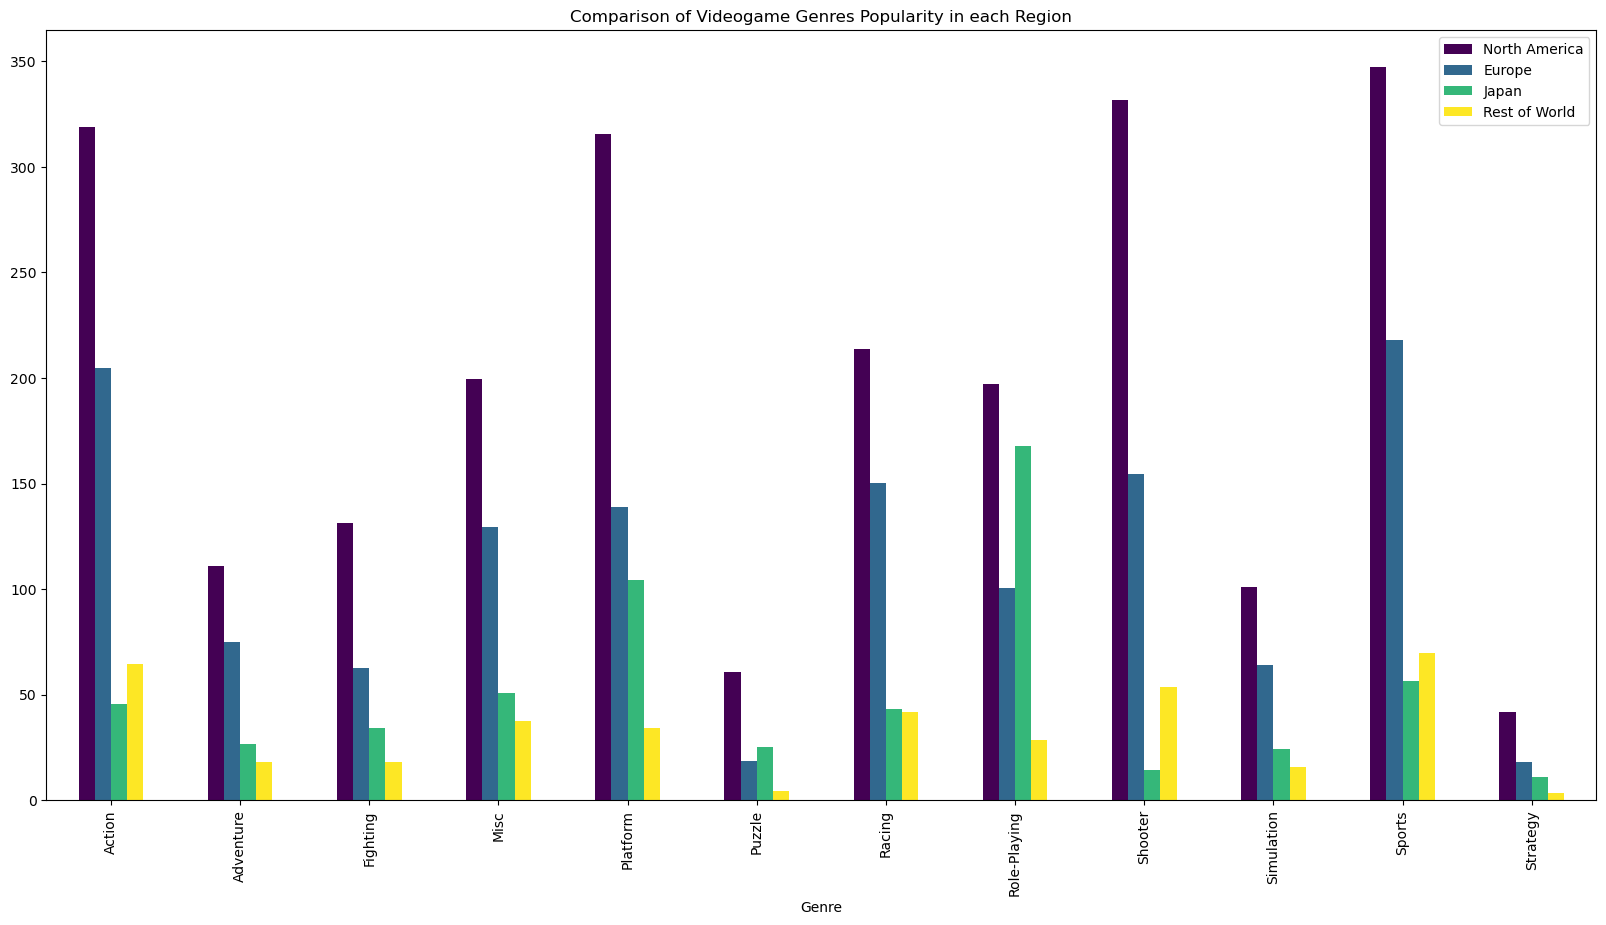

In [18]:
all_locations.plot(kind='bar', figsize=(20,10), colormap='viridis', title='Comparison of Videogame Genres Popularity in each Region')
plt.show()

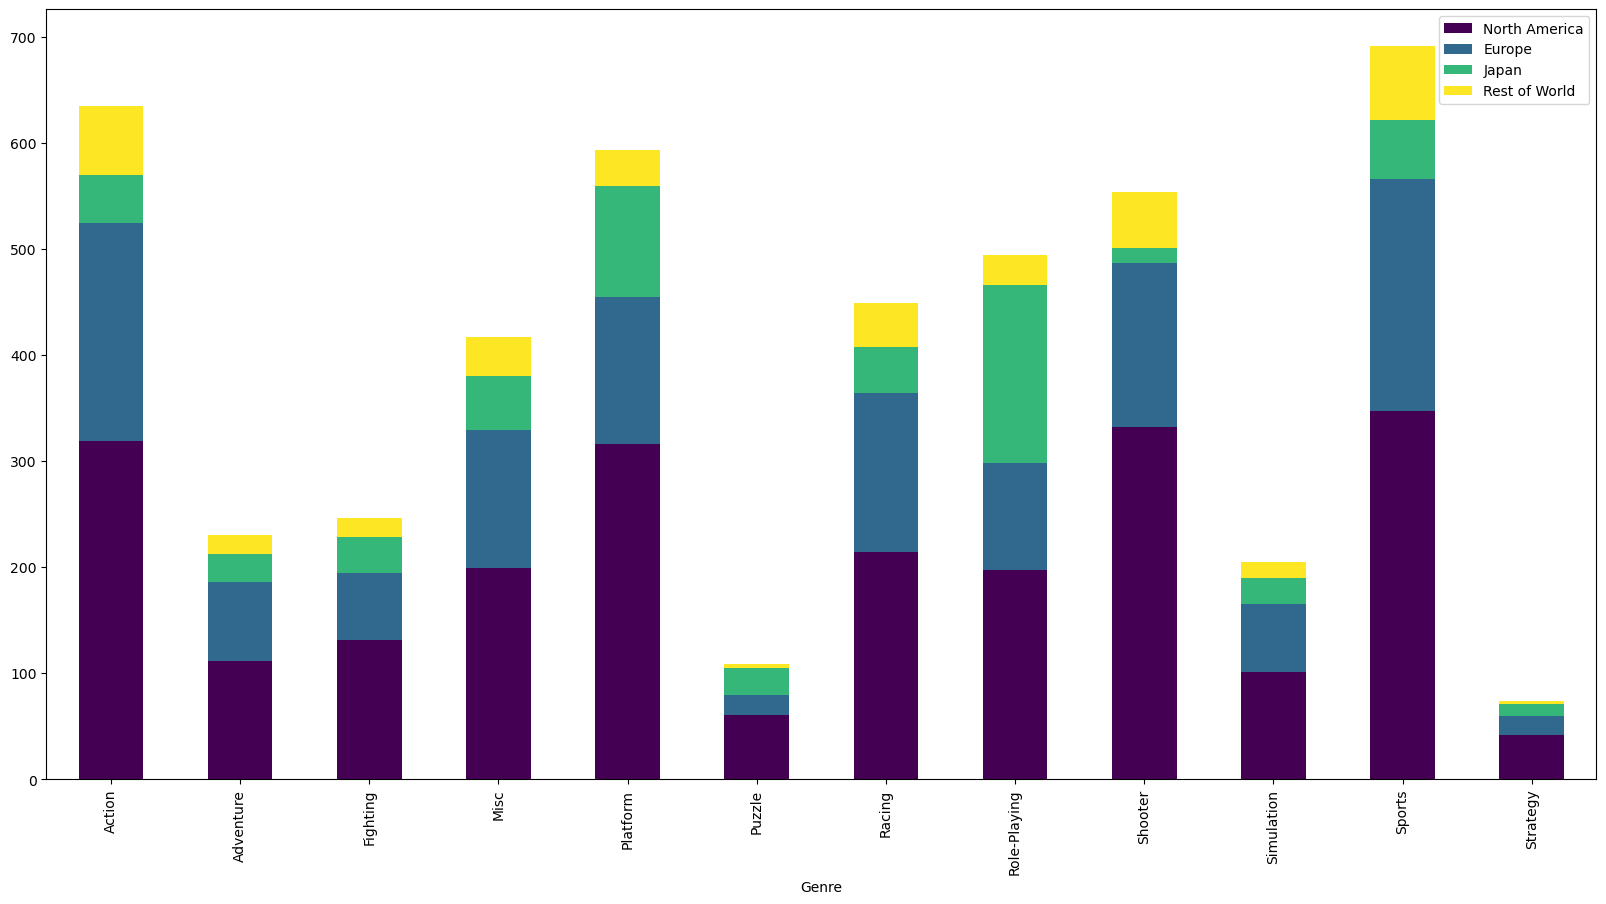

In [19]:
all_locations.plot(kind='bar', figsize=(20,10), stacked=True, colormap='viridis')
plt.show()

trends of popular genres for a ten year period from 2000 to 2010 in North America

In [20]:
ten_year_data = game_df[(game_df['Year'] >= 2001) & (game_df['Year'] <= 2010)]

In [21]:
ten_year_data['Year'].unique()

array([2006., 2008., 2009., 2005., 2007., 2004., 2010., 2002., 2001.,
       2003.])

In [22]:
ten_year_data.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
total_sales      0
dtype: int64

<Axes: title={'center': 'Total Video Game Sales from 2001 to 2010 in North America'}, xlabel='Year'>

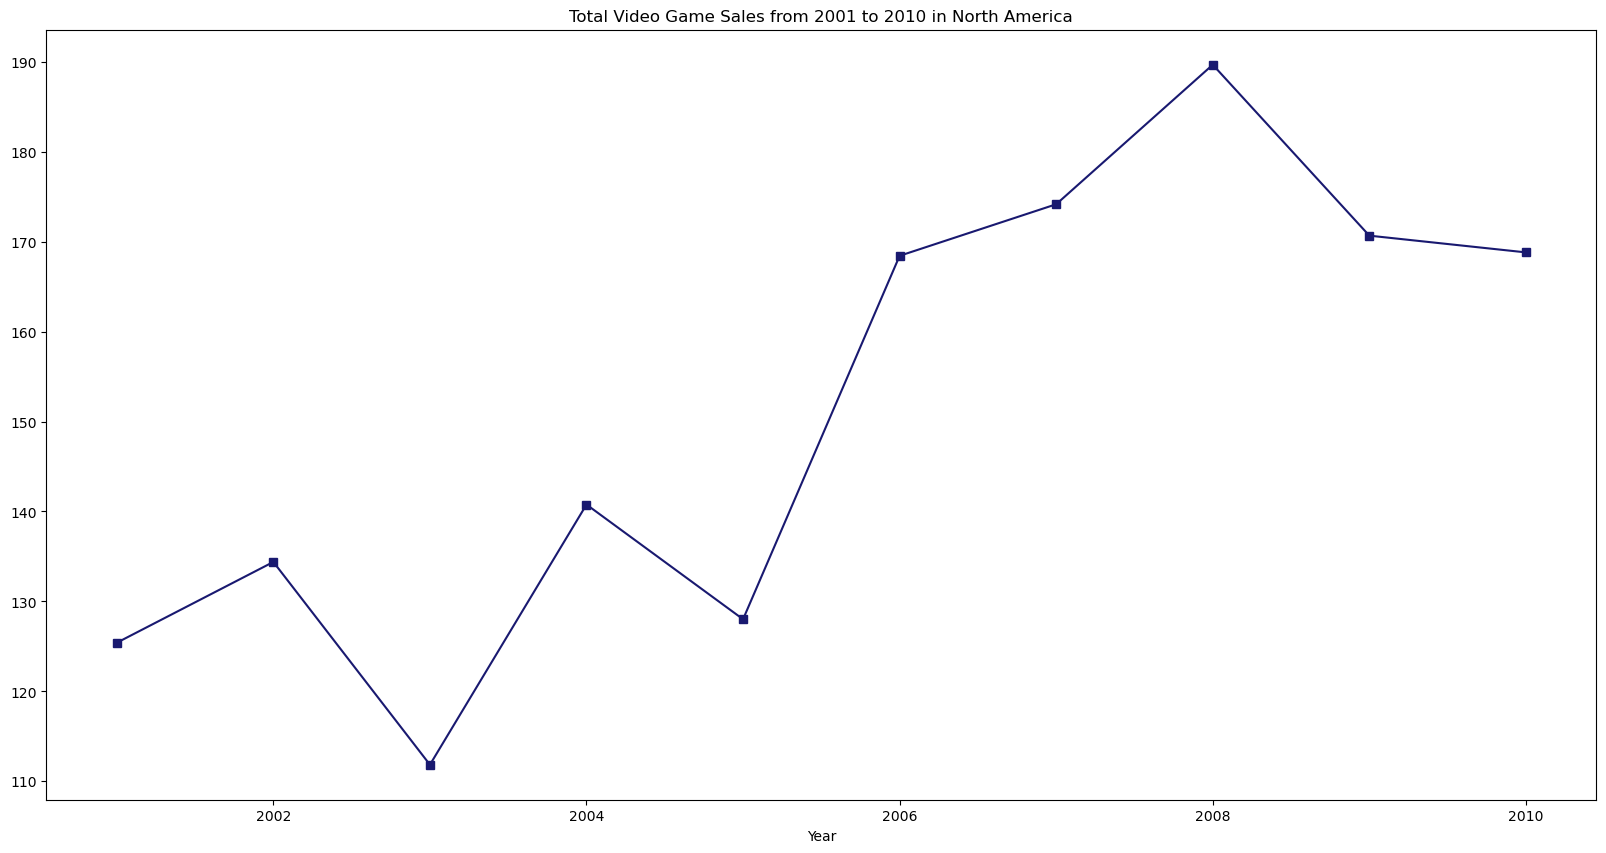

In [23]:
ten_year_data.groupby(['Year'])['North America'].sum().plot(marker='s', figsize=(20,10), color='midnightblue', title='Total Video Game Sales from 2001 to 2010 in North America')

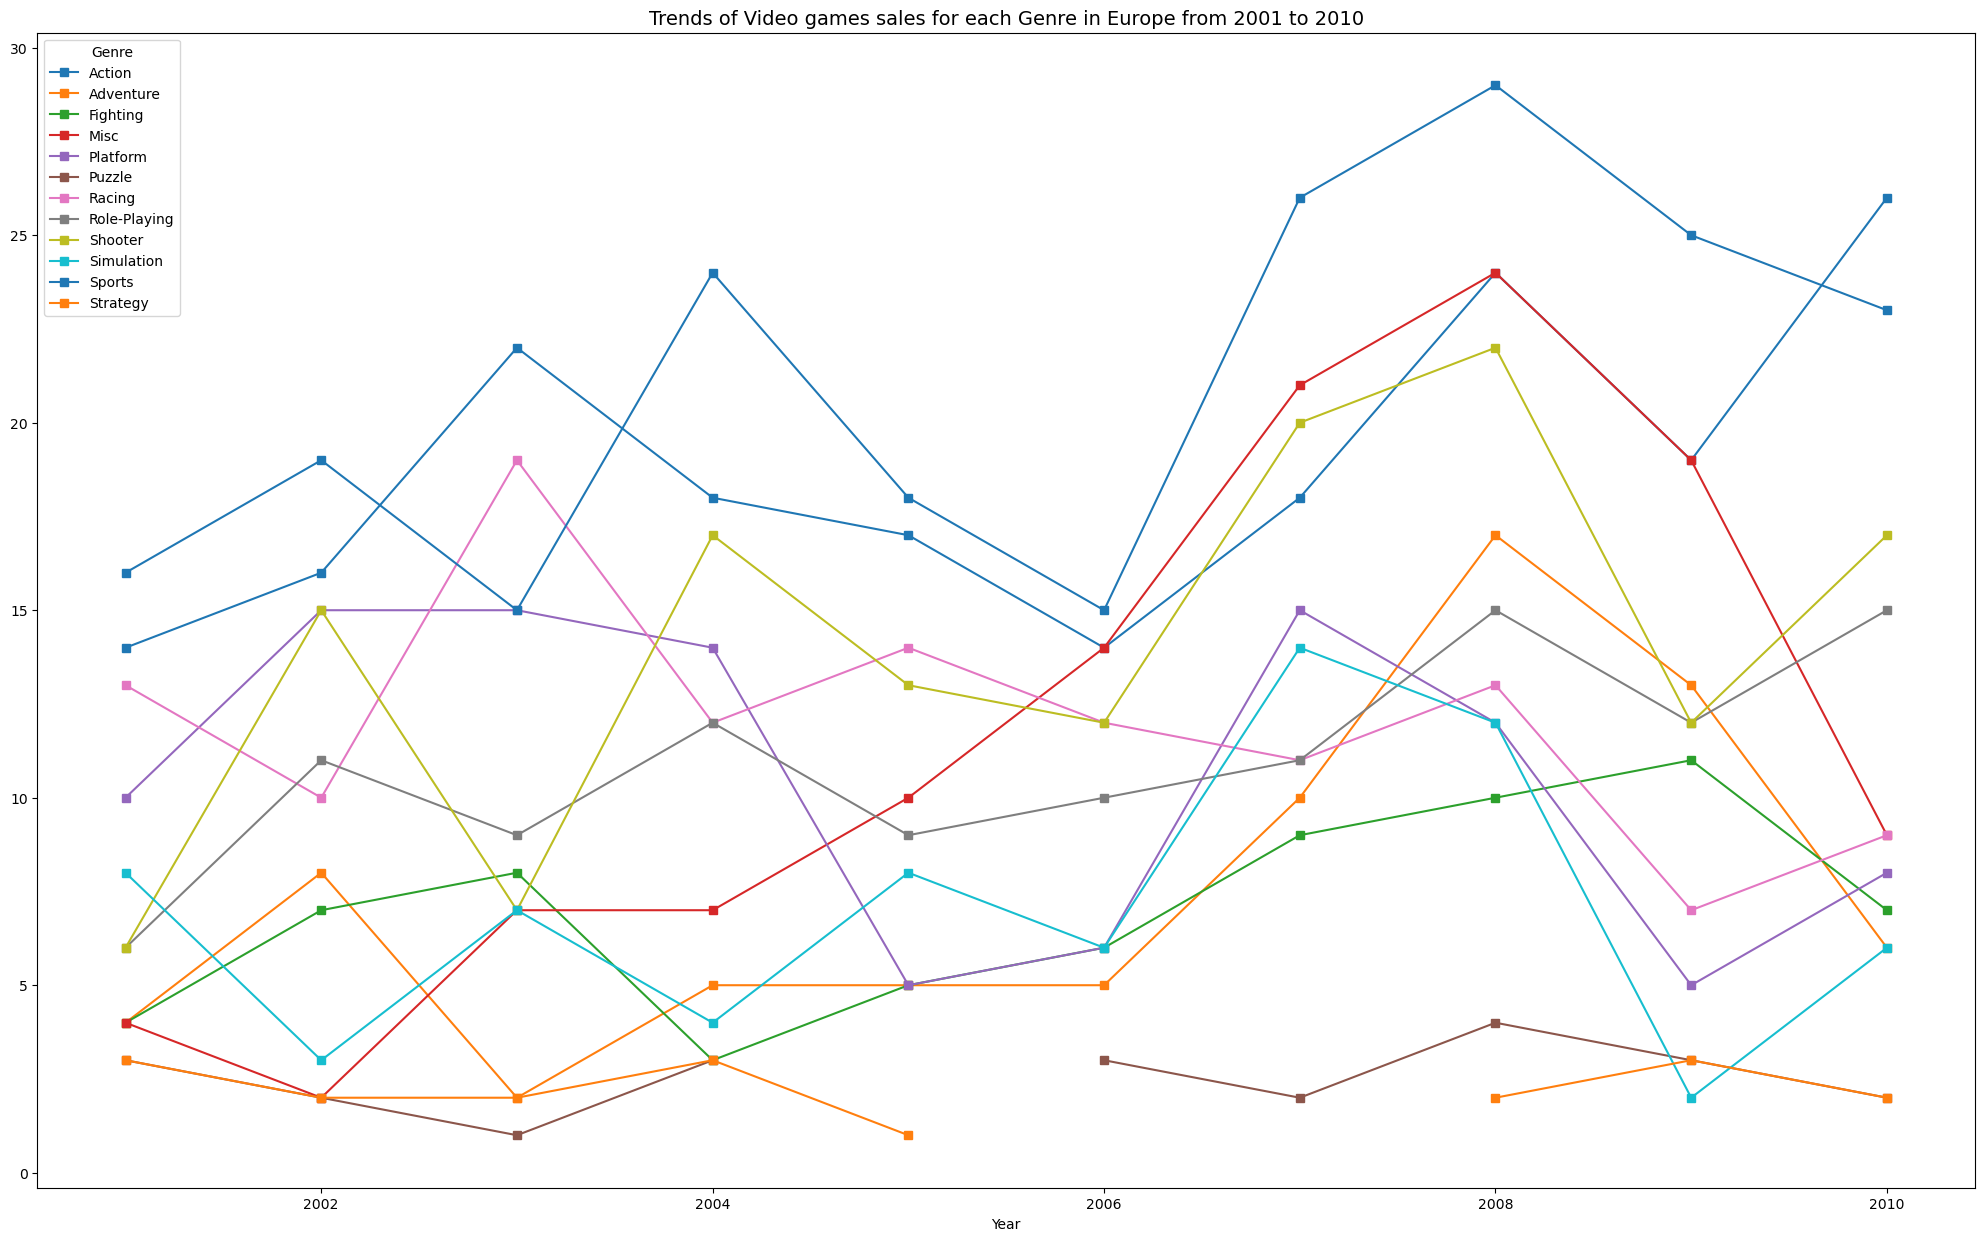

In [24]:
EU_10 = ten_year_data.groupby(['Year','Genre'])['Europe'].size().unstack()
EU_10.plot(figsize=(25,15), marker='s')
plt.title("Trends of Video games sales for each Genre in Europe from 2001 to 2010", fontsize=14)
plt.show()

Publisher Analysis

In [25]:
game_df['Publisher'].unique()

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'Unknown', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment', 'Level 5',
       'MTV Games', 'Codemasters', 'id Software', 'Havas Interactive',
       'Majesco Entertainment', 'Midway Games', 'Hudson Soft', 'JVC',
       'Valve Software', '989 Studios', 'Maxis', 'Square EA',
       'Tecmo Koei', 'Gotham Games', 'Deep Silver', 'Infogrames',
       'Arena Entertainment', 'Mindscape', 'Banpresto', 'NCSoft',
       'C

In [26]:
sorted(game_df['Review'].unique())

[30.5,
 31.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 37.58,
 38.15,
 39.0,
 40.0,
 40.38,
 42.0,
 44.0,
 45.0,
 45.12,
 46.0,
 46.83,
 47.0,
 47.38,
 48.0,
 48.07,
 48.97,
 49.0,
 50.0,
 51.0,
 51.08,
 51.24,
 51.82,
 51.9,
 52.0,
 52.33,
 52.65,
 52.67,
 53.0,
 53.04,
 53.19,
 53.33,
 53.53,
 53.93,
 54.0,
 54.43,
 54.5,
 54.62,
 54.78,
 55.0,
 55.36,
 55.85,
 56.0,
 56.19,
 56.4,
 56.42,
 57.0,
 57.2,
 57.44,
 57.57,
 57.75,
 58.0,
 58.67,
 59.0,
 59.05,
 59.23,
 59.33,
 59.67,
 59.85,
 60.0,
 60.17,
 60.2,
 60.22,
 60.69,
 61.0,
 61.57,
 61.6,
 61.61,
 61.64,
 61.75,
 62.0,
 62.78,
 62.81,
 62.83,
 62.9,
 63.0,
 63.04,
 63.18,
 63.23,
 63.46,
 63.61,
 63.63,
 64.0,
 64.01,
 64.34,
 64.48,
 64.64,
 64.65,
 65.0,
 65.29,
 65.39,
 65.56,
 65.58,
 65.89,
 66.0,
 66.41,
 66.5,
 66.58,
 66.64,
 66.76,
 66.88,
 66.89,
 66.97,
 67.0,
 67.02,
 67.03,
 67.17,
 67.25,
 67.38,
 67.44,
 67.62,
 67.67,
 67.78,
 67.8,
 67.95,
 68.0,
 68.04,
 68.12,
 68.3,
 68.67,
 68.7,
 68.73,
 68.88,
 69.0,
 69.03,

In [27]:
game_df.head(5)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,total_sales
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.13,76.28,81.13
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.56,82.07,33.56
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,31.52
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,30.26


We will analyse which publishers have the most sales with best reviews

In [28]:
game_df.groupby(['Publisher'])['Global'].sum().sort_values(ascending=False)

Publisher
Nintendo                       1447.86
Electronic Arts                 624.24
Sony Computer Entertainment     377.56
Activision                      370.01
Take-Two Interactive            208.39
                                ...   
Crystal Dynamics                  0.88
SCi                               0.87
Mastertronic                      0.86
Rage Software                     0.86
Pinnacle                          0.85
Name: Global, Length: 94, dtype: float64

In [34]:
# Group the data by year, genre, publisher, platform, and region
grouped = game_df.groupby(['Year', 'Genre', 'Publisher', 'Platform'])['Global'].sum().reset_index()
grouped

,Year,Genre,Publisher,Platform,Global
0,1983.0,Misc,Nintendo,NES,2.14
1,1983.0,Platform,Nintendo,NES,5.62
2,1983.0,Sports,Nintendo,NES,3.20
3,1984.0,Action,Nintendo,NES,1.85
4,1984.0,Puzzle,Hudson Soft,NES,1.10
...,...,...,...,...,...
1489,2012.0,Sports,Electronic Arts,PS3,2.94
1490,2012.0,Sports,Electronic Arts,X360,3.39
1491,2012.0,Sports,Konami Digital Entertainment,PS3,1.10
1492,2012.0,Sports,Sega,3DS,0.92


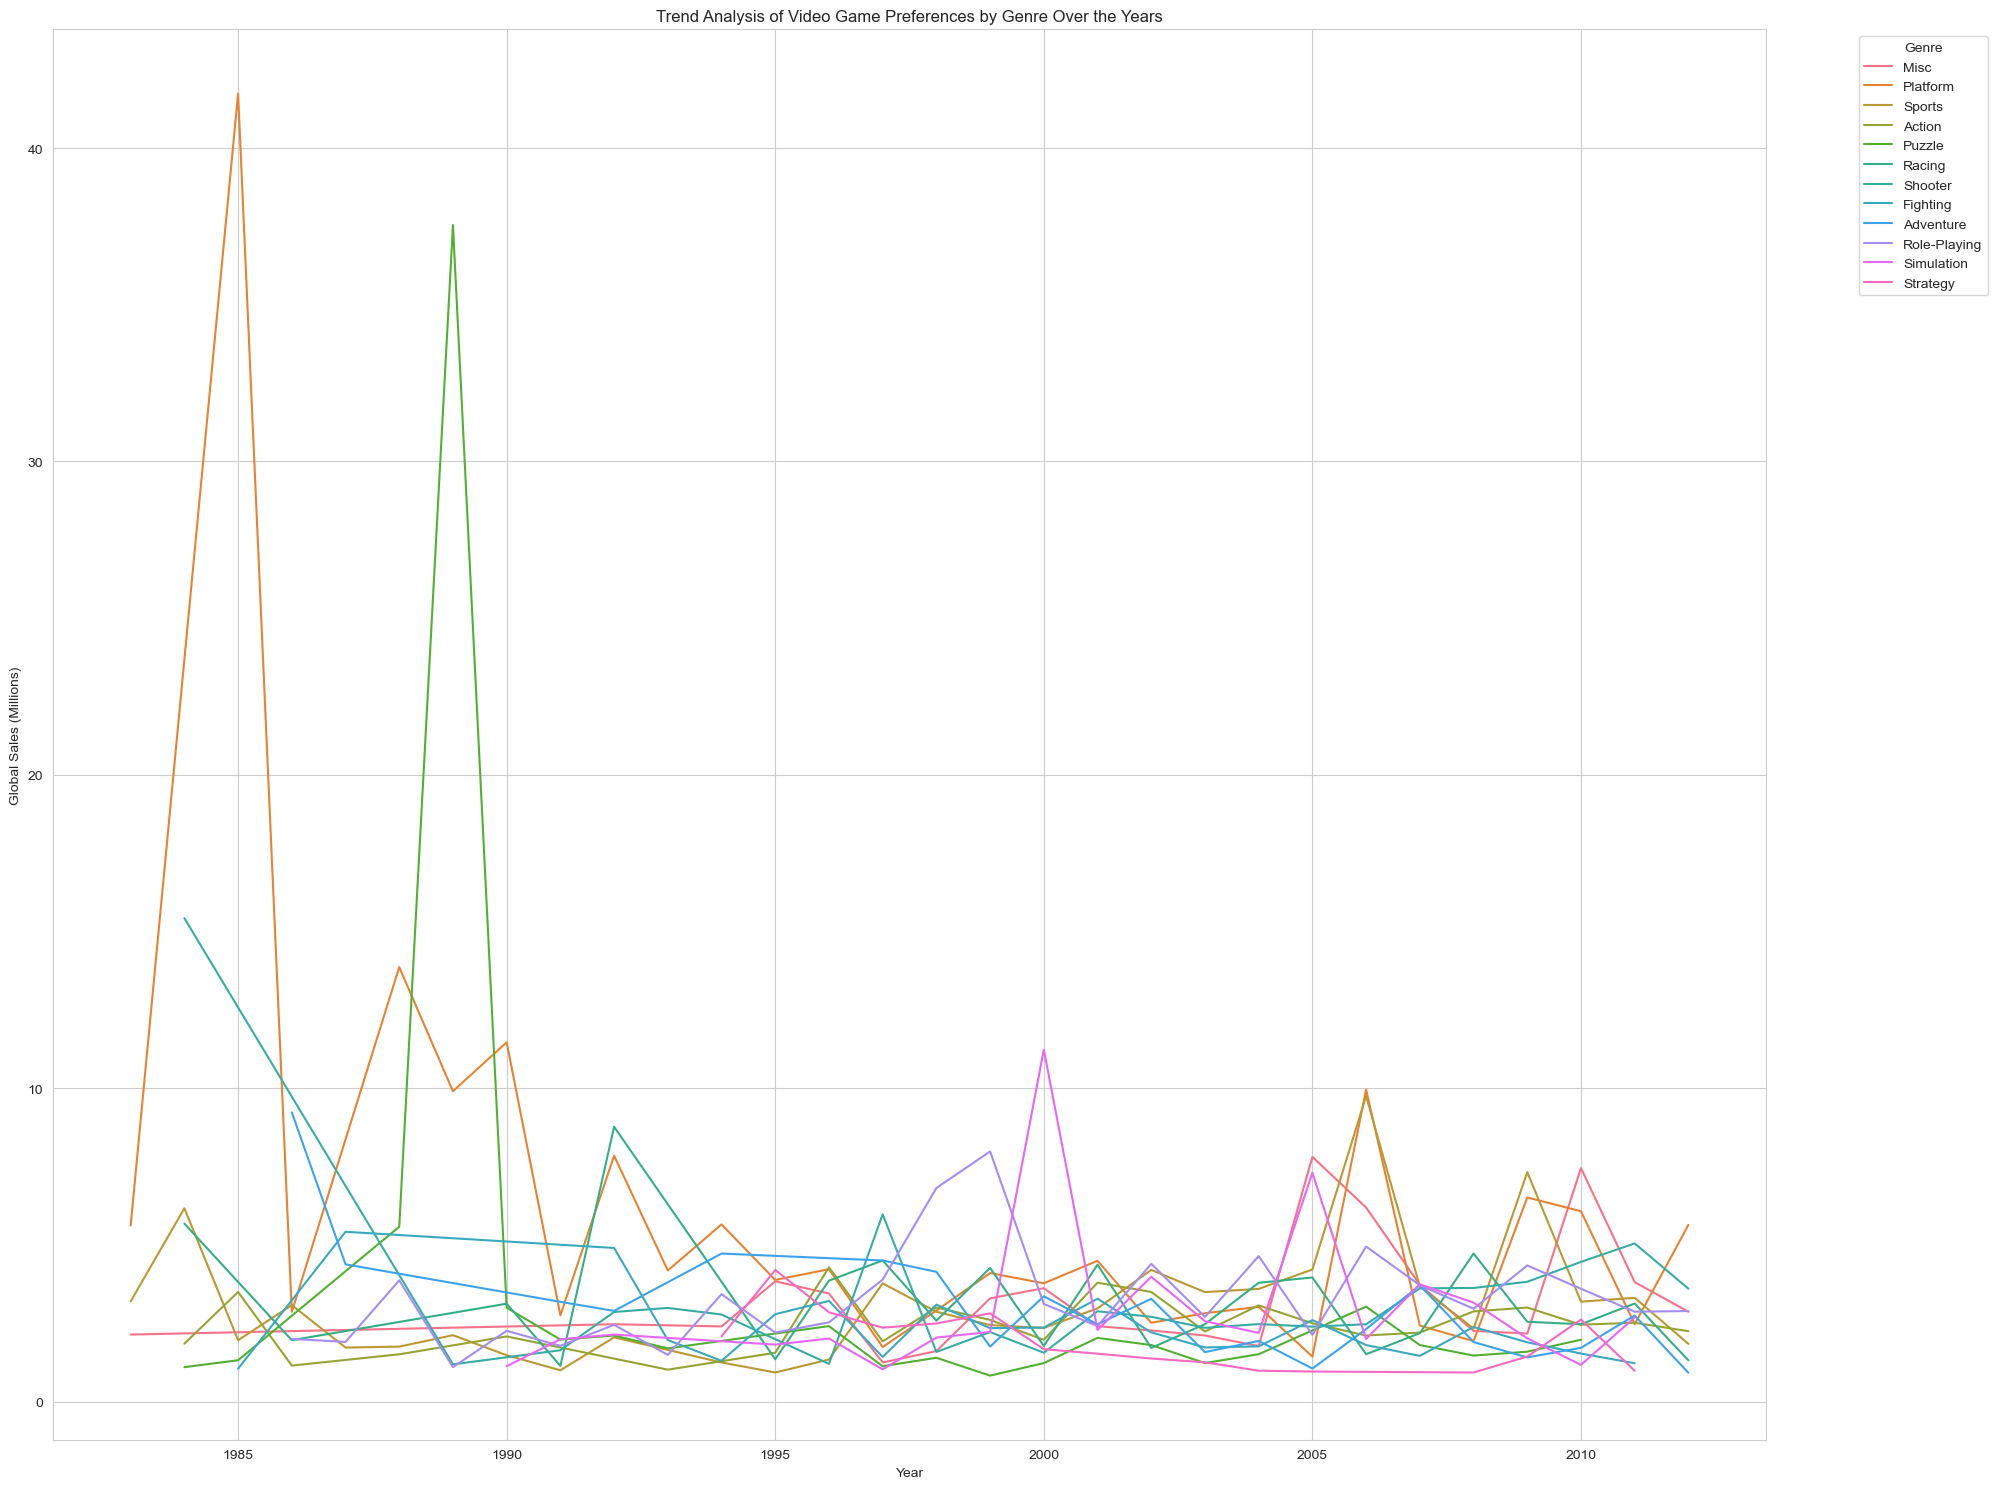

In [37]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the trend analysis of video game preferences by genre over the years
plt.figure(figsize=(20, 15))
sns.lineplot(data=grouped, x='Year', y='Global', hue='Genre', errorbar=None)
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Trend Analysis of Video Game Preferences by Genre Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Similarly, you can create plots for other aspects like publisher, platform, and region

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


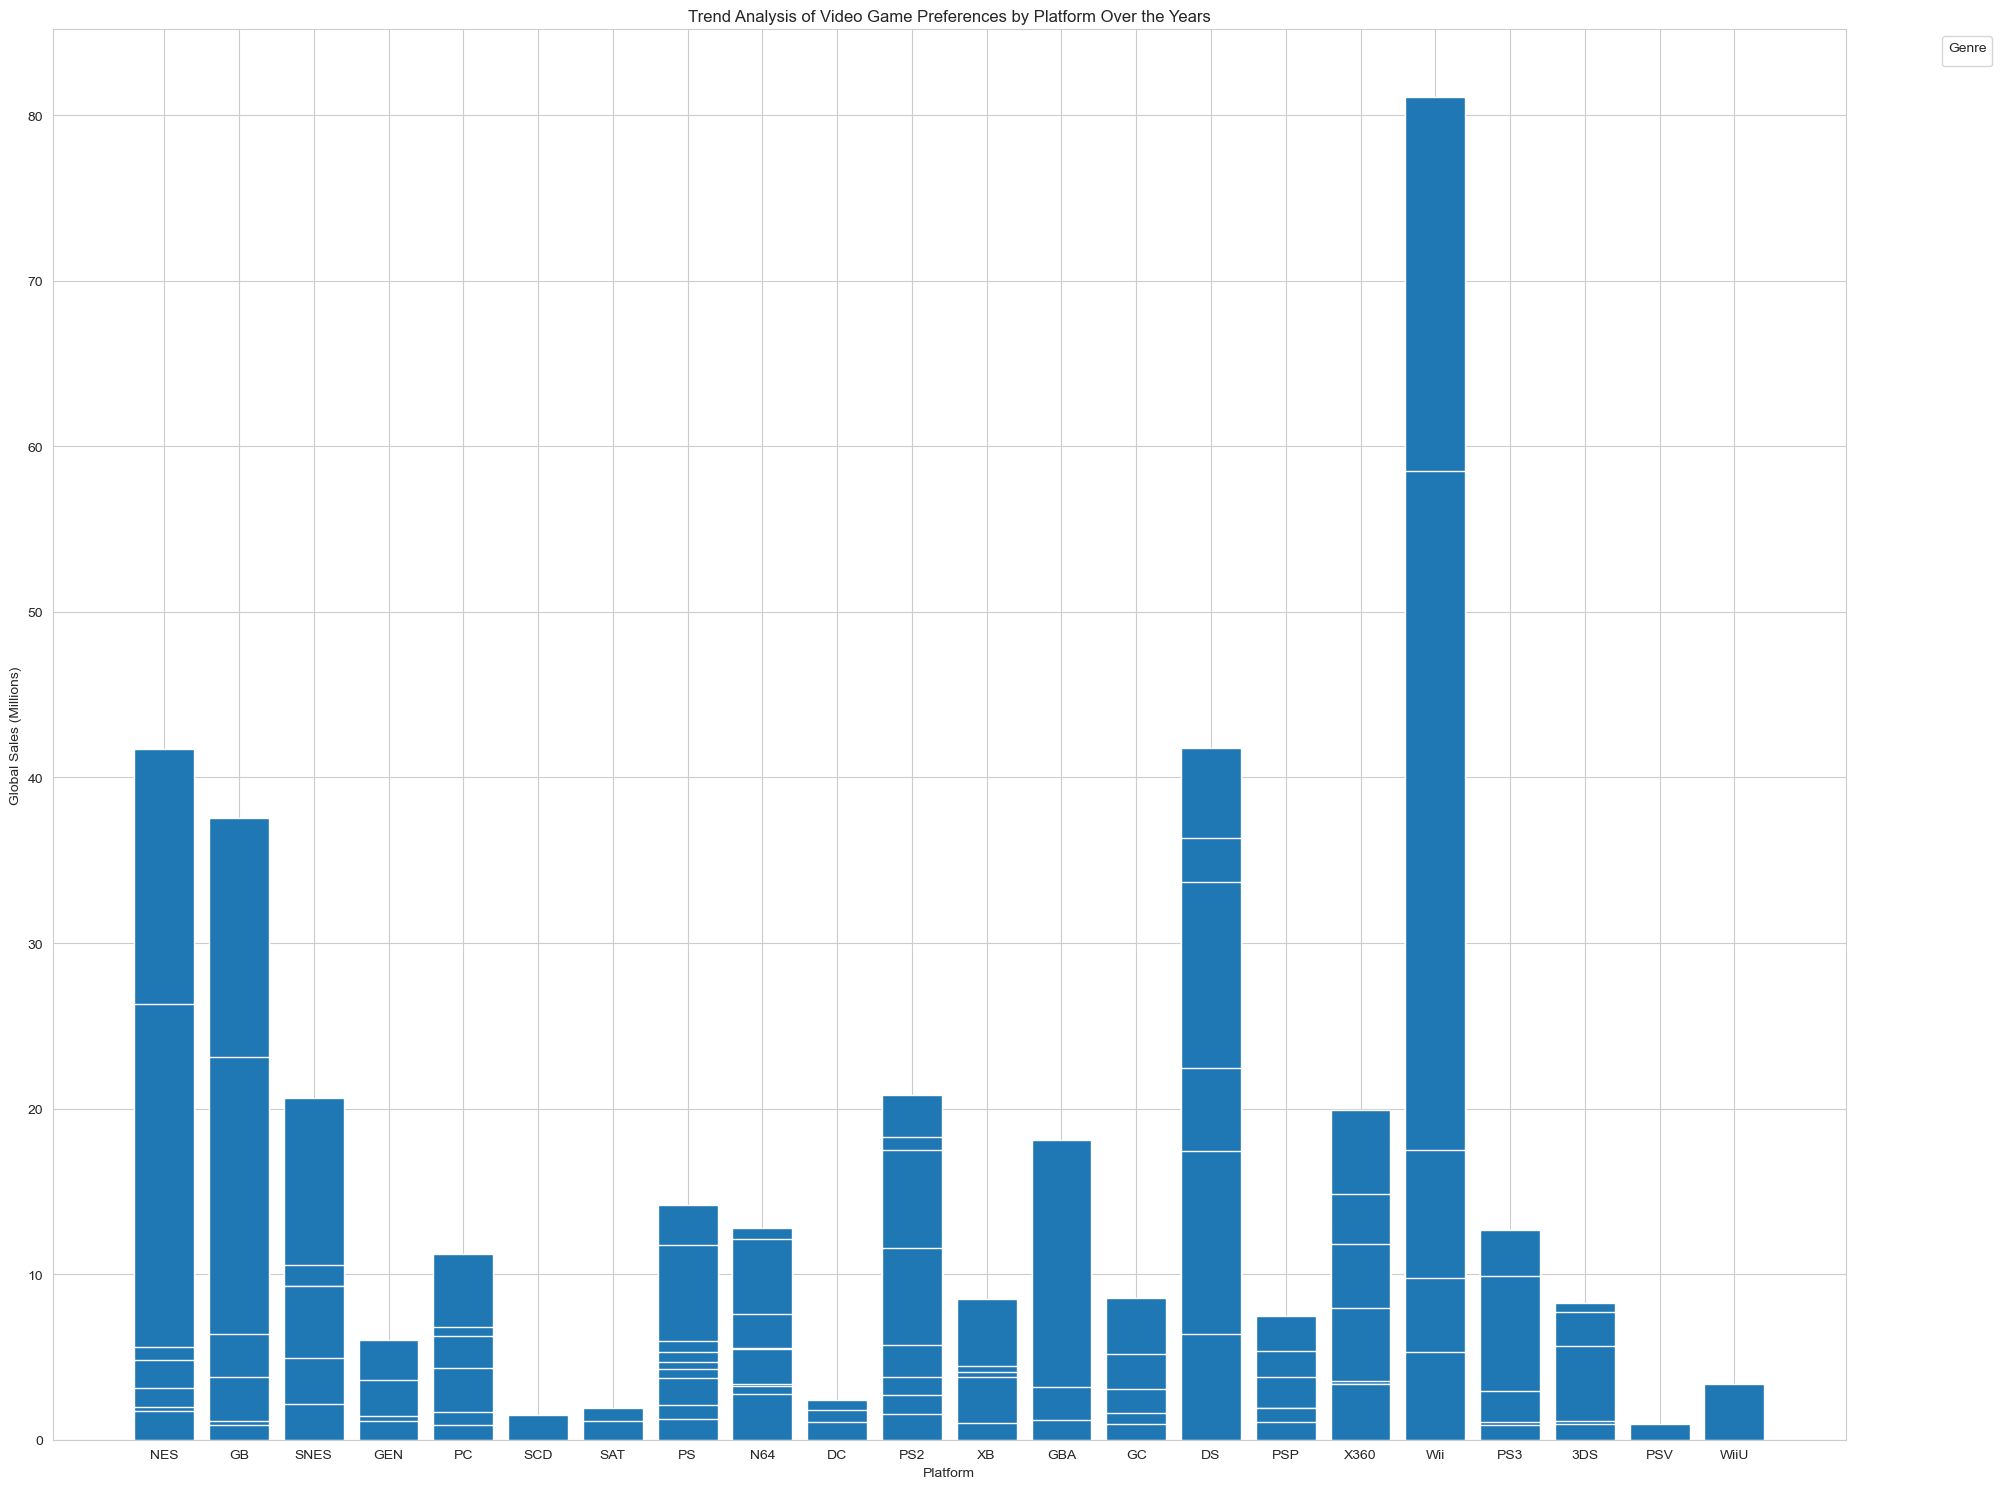

In [41]:
# Plot the trend analysis of video game preferences by genre over the years
plt.figure(figsize=(20, 15))
plt.bar(grouped['Platform'], grouped['Global'])
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Trend Analysis of Video Game Preferences by Platform Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()